# Preprocessing

In [158]:
import pandas as pd

In [159]:
df = pd.read_csv(r"C:\Users\nikol\OneDrive\Desktop\мага вышка\HSE_projects\SocialNetworks\data\friends_info.csv", sep=";")
print(len(df))
df.head(2)

100


,VK ID,ССЫЛКА НА ПРОФИЛЬ,ИМЯ,ФАМИЛИЯ,ПОЛ,ГОРОД,ЛЕТ,ДАТА РОЖДЕНИЯ,РОДНОЙ ГОРОД,VK КОРОТКИЙ АДРЕС,...,СТАТУС,ТЕКУЩАЯ ЗАНЯТОСТЬ/РАБОТА,ГРУППА ТЕКУЩЕЙ ЗАНЯТОСТИ/РАБОТЫ,СЕМЕЙНОЕ ПОЛОЖЕНИЕ,ИМЯ ПАРТНЁРА,ФАМИЛИЯ ПАРТНЁРА,КОМПАНИЯ,ДОЛЖНОСТЬ,ВУЗ,Unnamed: 20
0,2105955,https://vk.com/id2105955,Юрий,Халтурин,М,Москва,41.0,2.6.1983,Екатеринбург,id2105955,...,"Это не блог, не площадка для дискуссий, не про...",Школа ОРТ 1540,https://vk.com/public187634485,женат,NaN,NaN,Школа ОРТ 1540,"Учитель истории и обществознания, заведующий к...",УрФУ им. первого Президента России Б. Н. Ельцина,NaN
1,6304277,https://vk.com/id6304277,Дмитрий,Кравцов,М,Москва,NaN,26.6,Таганрог,id6304277,...,NaN,МГТУ им. Баумана,NaN,женат,NaN,NaN,Biolink,Заместитель директора по развитию бизнеса,МГТУ им. Баумана,NaN


In [160]:
df["ИМЯ И ФАМИЛИЯ"] = df["ИМЯ"] + " " + df["ФАМИЛИЯ"]

In [161]:
df.columns

Index(['VK ID', 'ССЫЛКА НА ПРОФИЛЬ', 'ИМЯ', 'ФАМИЛИЯ', 'ПОЛ', 'ГОРОД', 'ЛЕТ',
       'ДАТА РОЖДЕНИЯ', 'РОДНОЙ ГОРОД', 'VK КОРОТКИЙ АДРЕС', 'НИКНЕЙМ',
       'СТАТУС', 'ТЕКУЩАЯ ЗАНЯТОСТЬ/РАБОТА', 'ГРУППА ТЕКУЩЕЙ ЗАНЯТОСТИ/РАБОТЫ',
       'СЕМЕЙНОЕ ПОЛОЖЕНИЕ', 'ИМЯ ПАРТНЁРА', 'ФАМИЛИЯ ПАРТНЁРА', 'КОМПАНИЯ',
       'ДОЛЖНОСТЬ', 'ВУЗ', 'Unnamed: 20', 'ИМЯ И ФАМИЛИЯ'],
      dtype='object')

In [162]:
school = pd.read_csv(r"C:\Users\nikol\OneDrive\Desktop\мага вышка\HSE_projects\SocialNetworks\data\school_and_interests.csv", sep=";")
school.head(2)

,VK ID,ИМЯ И ФАМИЛИЯ,ДРУЗЕЙ,ПОДПИСЧИКОВ,ФОТОГРАФИЙ,ФОТОАЛЬБОМОВ,ВИДЕОЗАПИСЕЙ,АУДИОЗАПИСЕЙ,ГРУПП,ЗАМЕТОК,ШКОЛА,ДЕЯТЕЛЬНОСТЬ,ИНТЕРЕСЫ,Unnamed: 13
0,2105955,Юрий Халтурин,677.0,NaN,90.0,1.0,NaN,NaN,NaN,NaN,Гимназия № 9,Образование,"Кино, психоанализ, философия, образование, лит...",NaN
1,6304277,Дмитрий Кравцов,990.0,69.0,35.0,NaN,11.0,NaN,125.0,NaN,Школа № 14,NaN,NaN,NaN


In [163]:
df["ШКОЛА"] = school["ШКОЛА"]

In [164]:
df = df.drop(columns=['ССЫЛКА НА ПРОФИЛЬ', 'ИМЯ', 'ФАМИЛИЯ', 'ПОЛ', 'ГОРОД', 'ЛЕТ',
       'ДАТА РОЖДЕНИЯ', 'РОДНОЙ ГОРОД', 'VK КОРОТКИЙ АДРЕС', 'НИКНЕЙМ',
       'СТАТУС', 'ТЕКУЩАЯ ЗАНЯТОСТЬ/РАБОТА', 'ГРУППА ТЕКУЩЕЙ ЗАНЯТОСТИ/РАБОТЫ',
       'СЕМЕЙНОЕ ПОЛОЖЕНИЕ', 'ИМЯ ПАРТНЁРА', 'ФАМИЛИЯ ПАРТНЁРА', 'КОМПАНИЯ',
       'ДОЛЖНОСТЬ', 'Unnamed: 20'])

In [165]:
df = df[['VK ID', 'ИМЯ И ФАМИЛИЯ', 'ШКОЛА', 'ВУЗ']]

In [166]:
df.columns

Index(['VK ID', 'ИМЯ И ФАМИЛИЯ', 'ШКОЛА', 'ВУЗ'], dtype='object')

In [167]:
df.to_csv(r"C:\Users\nikol\OneDrive\Desktop\мага вышка\HSE_projects\SocialNetworks\data\final_ego_data.csv", index=False)

In [168]:
df = pd.read_csv(r"C:\Users\nikol\OneDrive\Desktop\мага вышка\HSE_projects\SocialNetworks\data\final_ego_data.csv")
print(len(df))
df.head(2)

100


,VK ID,ИМЯ И ФАМИЛИЯ,ШКОЛА,ВУЗ
0,2105955,Юрий Халтурин,Гимназия № 9,УрФУ им. первого Президента России Б. Н. Ельцина
1,6304277,Дмитрий Кравцов,Школа № 14,МГТУ им. Баумана


Tried using code (sorting by school / uni), but not enough data in VK. Had to sort manually.
Like in real life, added connections between all time periods, except "other".

In [169]:
old_school = [
    'Тимофей Калякин', 
    'Екатерина Вахницкая', 
    'Юрий Халтурин',
    'Наталья Крыгина',
    'Татьяна Геннадьевна',
    'Саша Данилов',
    'Елена Семёнова',
    'Наталия Конник',
    'Настя Тищенко',
    'Владимир Чепухин',
]
new_school = [
    'Кирилл Саенко', 
    'Ольга Шкода', 
    'Veronika Gorshkova',
    'Дмитрий Кравцов',
    'Михаил Панченко',
    'Константин Шишов',
    'Полина Орлова',
    'Лингур Исламов',
    'Артем Аветисян',
    'Elizaveta Mesnyankina',
    'Артем Горелов',
    'Александр Кузнецов',
    'Степан Смирнов',
    'Егор Екатериничев',
    'Тоня Разумовская',
    'Сергей Ястребов',
    'Полина Райкова',
    'Катя Ключко',
    'Антон Кузнецов',
]

In [170]:
mgimo = [
    'Никита Копейко',
    'Вячеслав Калашников',
    'Alexander Dedyaev',
    'Юлия Романченко',
    'Альбина Мурзина',
    'Валерия Лаптева',
    'Елизавета Вышегородцева',
    'Дмитрий Ванин',
    'Полина Андреева',
    'Владимир Хачатрян',
    'Кирилл Шаталов',
    'Юлия Горбунова',
    'Роман Калюжин',
    'Артём Асрумян',
    'Ксения Бирюкова',
    'Микаэл Вартанян',
    'Карен Бабаджанян',
    'Екатерина Абросимова',
    'Анна Волкова',
    'Таисия Михайловская',
    'Тагир Нагуманов',
    'Денис Сапунцов',
    'Александр Алексеев',
    'Ольга Сакун',
    'Лена Давыдова',
    'Егор Васильев',
]

In [171]:
marchi = [
    'Екатерина Тихонова',
    'Аня Шляхтурова',
    'Valentina Tatosyan',
    'Семён Пименов',
    'Rachel Smythe',
    'Александра Домбровская',
]

In [172]:
hse = [
    'Дарья Челнокова',
    'Мария Манина',
    'Вероника Зыкова',
    'Дарья Ионова',
    'Катерина Заливина',
    'Антон Козлов',
    'Камиль Салямов',
    'Полина Лазукова',
    'Антон Переходов',
    'Даша Игнатенко',
    'Софья Паршина',
    'Anastasie Maximova',
]

In [173]:
other = [
    'Сарвар Машхуров',
    'Иван Бутнев',
    'Ярослав Макаров',
    'Азик Салманов',
    'Влад Могиленко',
    'Лана Миллова',
    'Михаил Межевикин',
    'Ник Раск',
    'Eric Lukin',
    'Mark Tokovinin',
    'Алла Литтл',
    'Josh Rocksmysocks',
    'Олег Язвенко',
    'Антон Сай',
    'Александр Ганибаев',
    'Александра Аветикян',
    'Егор Алимов',
    'Дина Мурова',
    'Янина Иванчина',
    'Дмитрий Кара',
    'Кирилл Логунов',
    'София Гапаева',
    'Артем Гулов',
    'Миха Лукин',
    'Лейли Джафарли',
    'Дарья Строгова',
    'Настя Потемкина',
]

In [174]:
import networkx as nx

G = nx.Graph()

for i, row in df.iterrows():
    vk_id = row['ИМЯ И ФАМИЛИЯ']
    attributes = {
        'name': row['ИМЯ И ФАМИЛИЯ'],
        'school': row['ШКОЛА'],
        'university': row['ВУЗ']
    }
    G.add_node(vk_id, **attributes)

In [175]:
name_to_id = {name: int(df[df['ИМЯ И ФАМИЛИЯ'] == name]['VK ID'].values[0]) for name in df['ИМЯ И ФАМИЛИЯ']}
id_to_name = {vk_id: name for name, vk_id in name_to_id.items()}
print(name_to_id["Юрий Халтурин"], id_to_name[2105955])

2105955 Юрий Халтурин


In [176]:
# groups = [old_school, new_school, mgimo, marchi, hse]
# groups_ids = []
# for g in groups:
#     groups_ids.append([int(df[df['ИМЯ И ФАМИЛИЯ'] == name]['VK ID'].values[0]) for name in g])

In [177]:
# nx.write_adjlist(G, r"C:\Users\nikol\OneDrive\Desktop\мага вышка\HSE_projects\SocialNetworks\data\vk_friends.adjlist",
#                  delimiter=", ")

hand-deleting some people (some people came to school later so were not friends with some teachers)

In [178]:
new_G = nx.read_adjlist(r"C:\Users\nikol\OneDrive\Desktop\мага вышка\HSE_projects\SocialNetworks\data\vk_friends.adjlist", delimiter=", ")

# Network Construction

In [179]:
G.add_edges_from(new_G.edges())

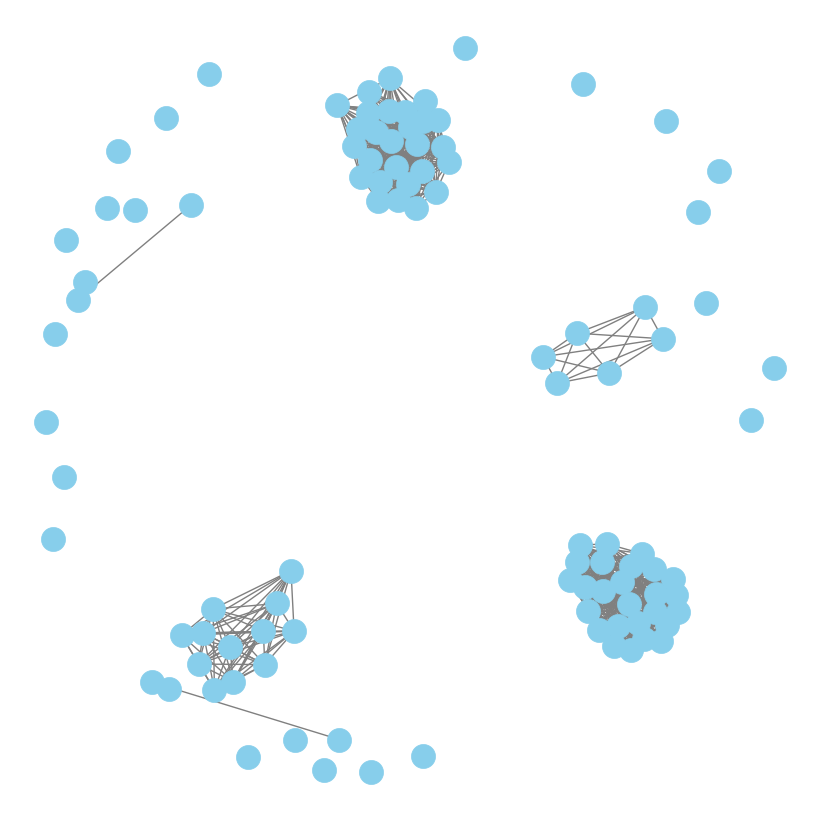

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)

nx.draw(G, pos, with_labels=False, node_size=300, node_color="skyblue", edge_color="gray", linewidths=0.5)
plt.show()

In [181]:
G.is_directed()

False

In [182]:
nx.is_weighted(G)

False

In [183]:
len(G.edges), len(G.nodes)

(735, 100)

In [184]:
node_attributes = [list(G.nodes[n].keys()) for n in G.nodes]
print(node_attributes[0])

['name', 'school', 'university']


In [185]:
largest_cc = max(nx.connected_components(G), key=len)
new_G = G.subgraph(largest_cc).copy()

In [207]:
len(new_G.nodes)

27

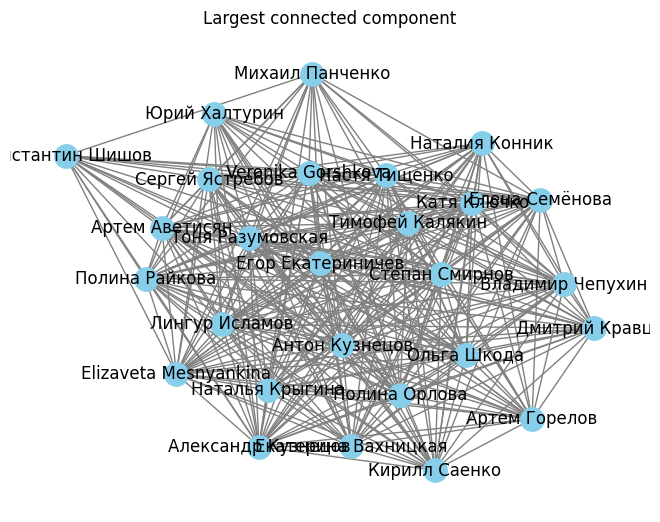

In [186]:
nx.draw(new_G, pos, with_labels=True, node_color="skyblue", edge_color="gray", linewidths=0.5)
plt.title("Largest connected component")
plt.show()

In [187]:
print("Diameter:", nx.diameter(new_G))
print("Radius:", nx.radius(new_G))


Diameter: 2
Radius: 1


In [188]:
global_clustering = nx.transitivity(new_G)
average_local_clustering = nx.average_clustering(new_G)
print(global_clustering)
print(average_local_clustering)

0.9470603537981269
0.952671680776256


In [189]:
print(nx.average_shortest_path_length(new_G))

1.0683760683760684


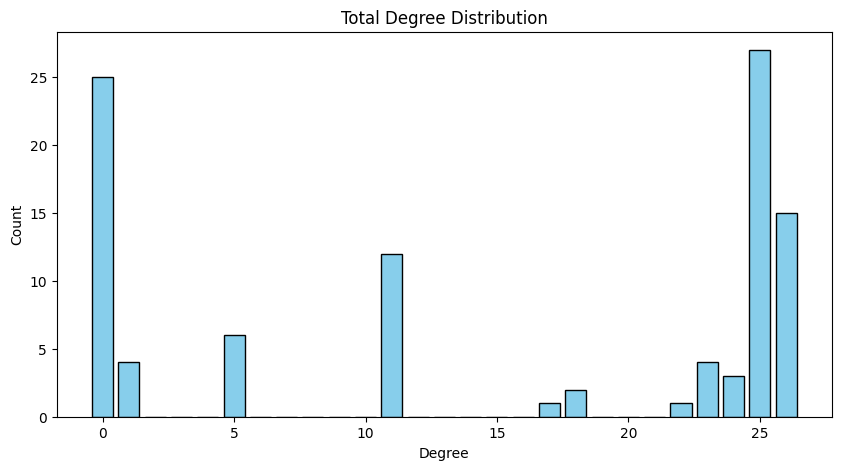

In [190]:
import numpy as np

degrees = [degree for _, degree in G.degree()]
degree_counts = np.bincount(degrees)

plt.figure(figsize=(10, 5))
plt.bar(range(len(degree_counts)), degree_counts, color='skyblue', edgecolor='black')
plt.title("Total Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

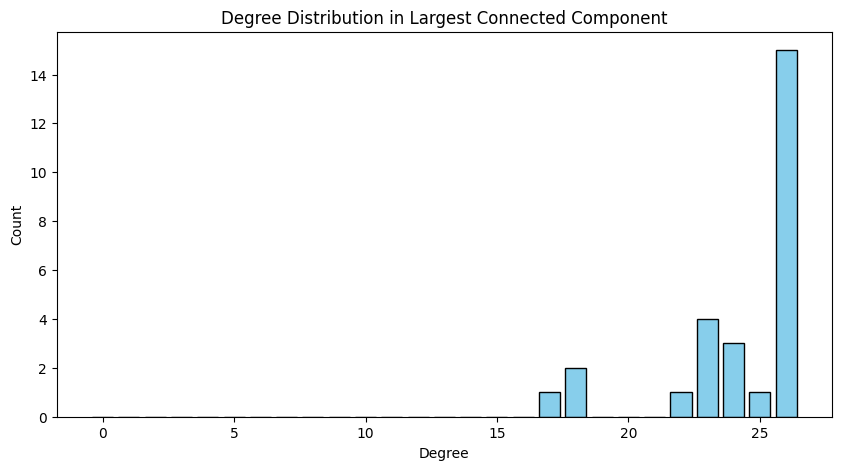

In [191]:
import numpy as np

degrees = [degree for _, degree in new_G.degree()]
degree_counts = np.bincount(degrees)

plt.figure(figsize=(10, 5))
plt.bar(range(len(degree_counts)), degree_counts, color='skyblue', edgecolor='black')
plt.title("Degree Distribution in Largest Connected Component")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

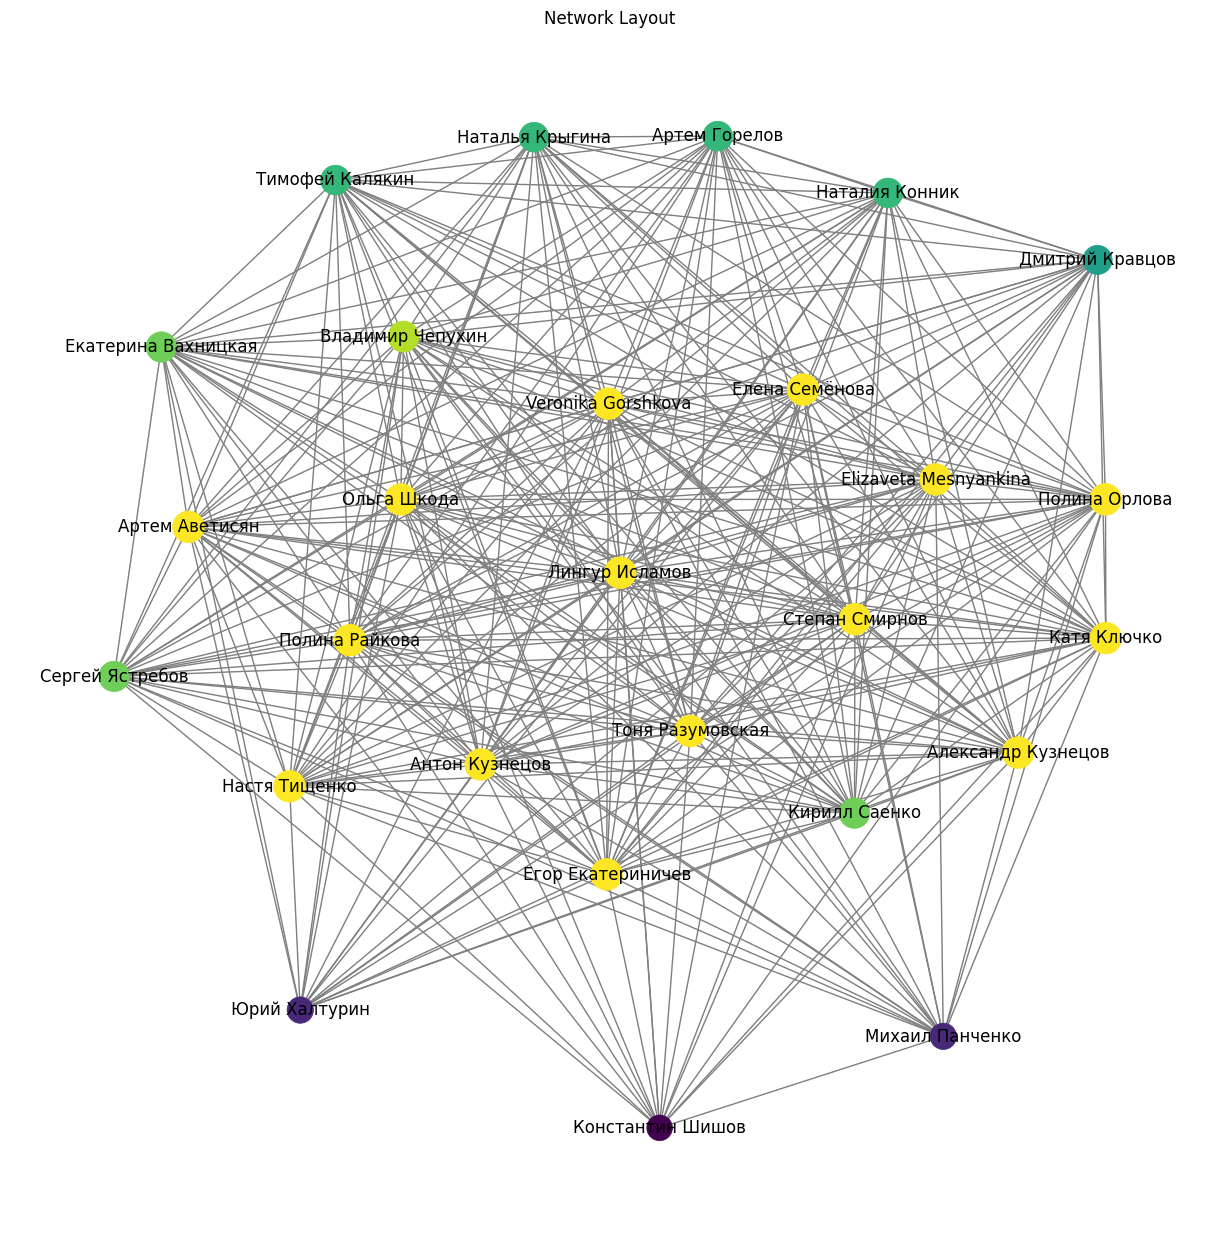

In [204]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(new_G, k=0.8, seed=42)
node_sizes = [degree * 20 for degree in degrees]
node_colors = degrees
edge_widths = [(new_G.degree()[u] + new_G.degree()[v]) * 0.01 for u, v in new_G.edges()]  

nx.draw(new_G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, with_labels=True, edge_color="gray", linewidths=0.5)
nx.draw_networkx_edges(new_G, pos, width=edge_widths, edge_color="gray", alpha=0.2)
plt.title("Network Layout")
plt.show()

# Structural analysis

In [193]:
degree_centrality = nx.degree_centrality(new_G)
top_degree_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Nodes, Degree Centrality:", top_degree_nodes)

Top Nodes, Degree Centrality: [('Настя Тищенко', 1.0), ('Elizaveta Mesnyankina', 1.0), ('Ольга Шкода', 1.0), ('Тоня Разумовская', 1.0), ('Елена Семёнова', 1.0), ('Полина Райкова', 1.0), ('Veronika Gorshkova', 1.0), ('Полина Орлова', 1.0), ('Егор Екатериничев', 1.0), ('Александр Кузнецов', 1.0)]


In [194]:
closeness_centrality = nx.closeness_centrality(new_G)
top_closeness_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Nodes, Closeness Centrality:", top_closeness_nodes)

Top Nodes, Closeness Centrality: [('Настя Тищенко', 1.0), ('Elizaveta Mesnyankina', 1.0), ('Ольга Шкода', 1.0), ('Тоня Разумовская', 1.0), ('Елена Семёнова', 1.0), ('Полина Райкова', 1.0), ('Veronika Gorshkova', 1.0), ('Полина Орлова', 1.0), ('Егор Екатериничев', 1.0), ('Александр Кузнецов', 1.0)]


In [195]:
betweenness_centrality = nx.betweenness_centrality(new_G)
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Nodes, Betweenness Centrality:", top_betweenness_nodes)

Top Nodes, Betweenness Centrality: [('Настя Тищенко', 0.004381187440010969), ('Elizaveta Mesnyankina', 0.004381187440010969), ('Ольга Шкода', 0.004381187440010969), ('Тоня Разумовская', 0.004381187440010969), ('Елена Семёнова', 0.004381187440010969), ('Полина Райкова', 0.004381187440010969), ('Veronika Gorshkova', 0.004381187440010969), ('Полина Орлова', 0.004381187440010969), ('Егор Екатериничев', 0.004381187440010969), ('Александр Кузнецов', 0.004381187440010969)]


In [196]:
eigenvector_centrality = nx.eigenvector_centrality(new_G)
top_eigenvector_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Nodes, Eigenvector Centrality:", top_eigenvector_nodes)

Top Nodes, Eigenvector Centrality: [('Настя Тищенко', 0.20304100842849332), ('Елена Семёнова', 0.20304100842849332), ('Полина Райкова', 0.20304100842849332), ('Veronika Gorshkova', 0.20304100842849332), ('Полина Орлова', 0.20304100842849332), ('Егор Екатериничев', 0.20304100842849332), ('Александр Кузнецов', 0.20304100842849332), ('Артем Аветисян', 0.20304100842849332), ('Elizaveta Mesnyankina', 0.2030410084284933), ('Ольга Шкода', 0.2030410084284933)]


In [197]:
centrality_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Eigenvector Centrality': list(eigenvector_centrality.values()) if eigenvector_centrality else None,
})

top_nodes_summary = centrality_df.sort_values(by="Degree Centrality", ascending=False).head(10)
print("\nTop Nodes Summary:")
print(top_nodes_summary)



Top Nodes Summary:
                     Node  Degree Centrality  Closeness Centrality  \
2           Настя Тищенко                1.0                   1.0   
5             Ольга Шкода                1.0                   1.0   
4   Elizaveta Mesnyankina                1.0                   1.0   
9        Тоня Разумовская                1.0                   1.0   
20         Артем Аветисян                1.0                   1.0   
22         Лингур Исламов                1.0                   1.0   
18      Егор Екатериничев                1.0                   1.0   
16     Veronika Gorshkova                1.0                   1.0   
17          Полина Орлова                1.0                   1.0   
13         Полина Райкова                1.0                   1.0   

    Betweenness Centrality  Eigenvector Centrality  
2                 0.004381                0.203041  
5                 0.004381                0.203041  
4                 0.004381                0.203041

In [205]:
top_nodes_summary = centrality_df.sort_values(by="Degree Centrality", ascending=True).head(10)
print("\nTop Nodes Summary:")
print(top_nodes_summary)


Top Nodes Summary:
                Node  Degree Centrality  Closeness Centrality  \
14  Константин Шишов           0.653846              0.742857   
11     Юрий Халтурин           0.692308              0.764706   
15   Михаил Панченко           0.692308              0.764706   
6    Дмитрий Кравцов           0.846154              0.866667   
8    Тимофей Калякин           0.884615              0.896552   
0    Наталья Крыгина           0.884615              0.896552   
1     Наталия Конник           0.884615              0.896552   
26     Артем Горелов           0.884615              0.896552   
10     Кирилл Саенко           0.923077              0.928571   
7    Сергей Ястребов           0.923077              0.928571   

    Betweenness Centrality  Eigenvector Centrality  
14                0.000000                0.138174  
11                0.000000                0.148194  
15                0.000181                0.145931  
6                 0.000000                0.178605  

# Community detection

In [198]:
cliques = list(nx.find_cliques(G))
maximal_cliques = [clique for clique in cliques if len(clique) > 2]

print("Maximal Cliques:", len(maximal_cliques))

Maximal Cliques: 8


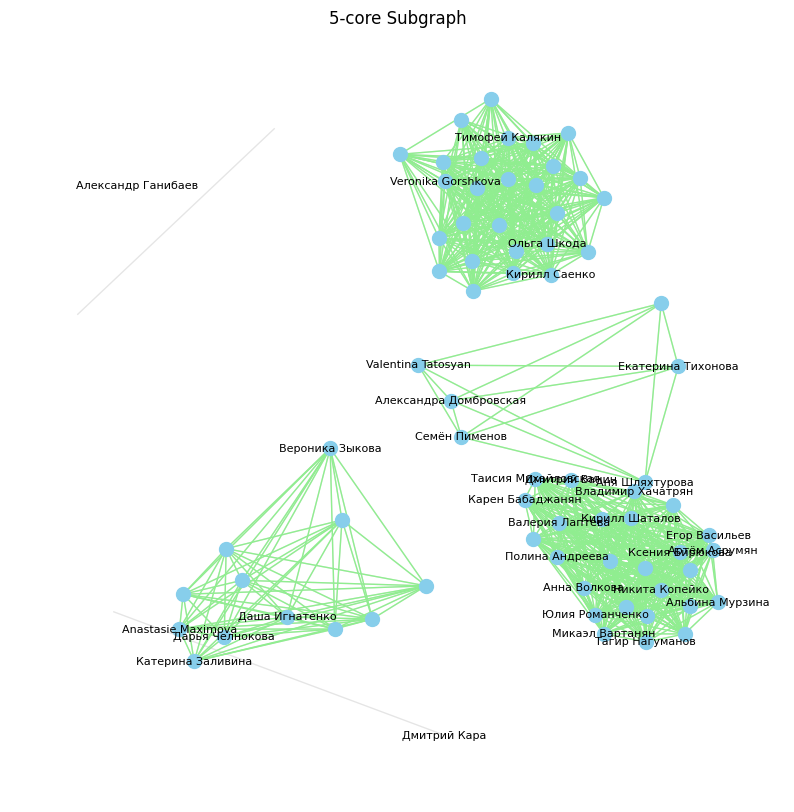

In [199]:
plt.figure(figsize=(10, 10))
k = 5
k_core = nx.k_core(G, k=k)
pos = nx.spring_layout(G, k=0.8, seed=42)

nx.draw_networkx_edges(G, pos, alpha=0.1)
nx.draw(k_core, pos, node_color="skyblue", edge_color="lightgreen", with_labels=False, node_size=100)

schools = ["Воробьёвы горы", "Лицей № 1525 «Воробьёвы горы»"]
universities = ["МГИМО МИД России", "НИУ ВШЭ (ГУ-ВШЭ)", "МАРХИ"]

eligible_nodes = [node for node, data in G.nodes(data=True) 
                  if data.get("school") in schools or data.get("university") in universities]
labels = {node: node for node in eligible_nodes}

nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color="black")

plt.title(f"{k}-core Subgraph")
plt.show()

In [200]:
from community import community_louvain

partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]
unique_communities = len(set(partition.values()))

modularity_score = community_louvain.modularity(partition, G)
print(f"Louvain Method Modularity Score: {modularity_score}")

Louvain Method Modularity Score: 0.598061918645009


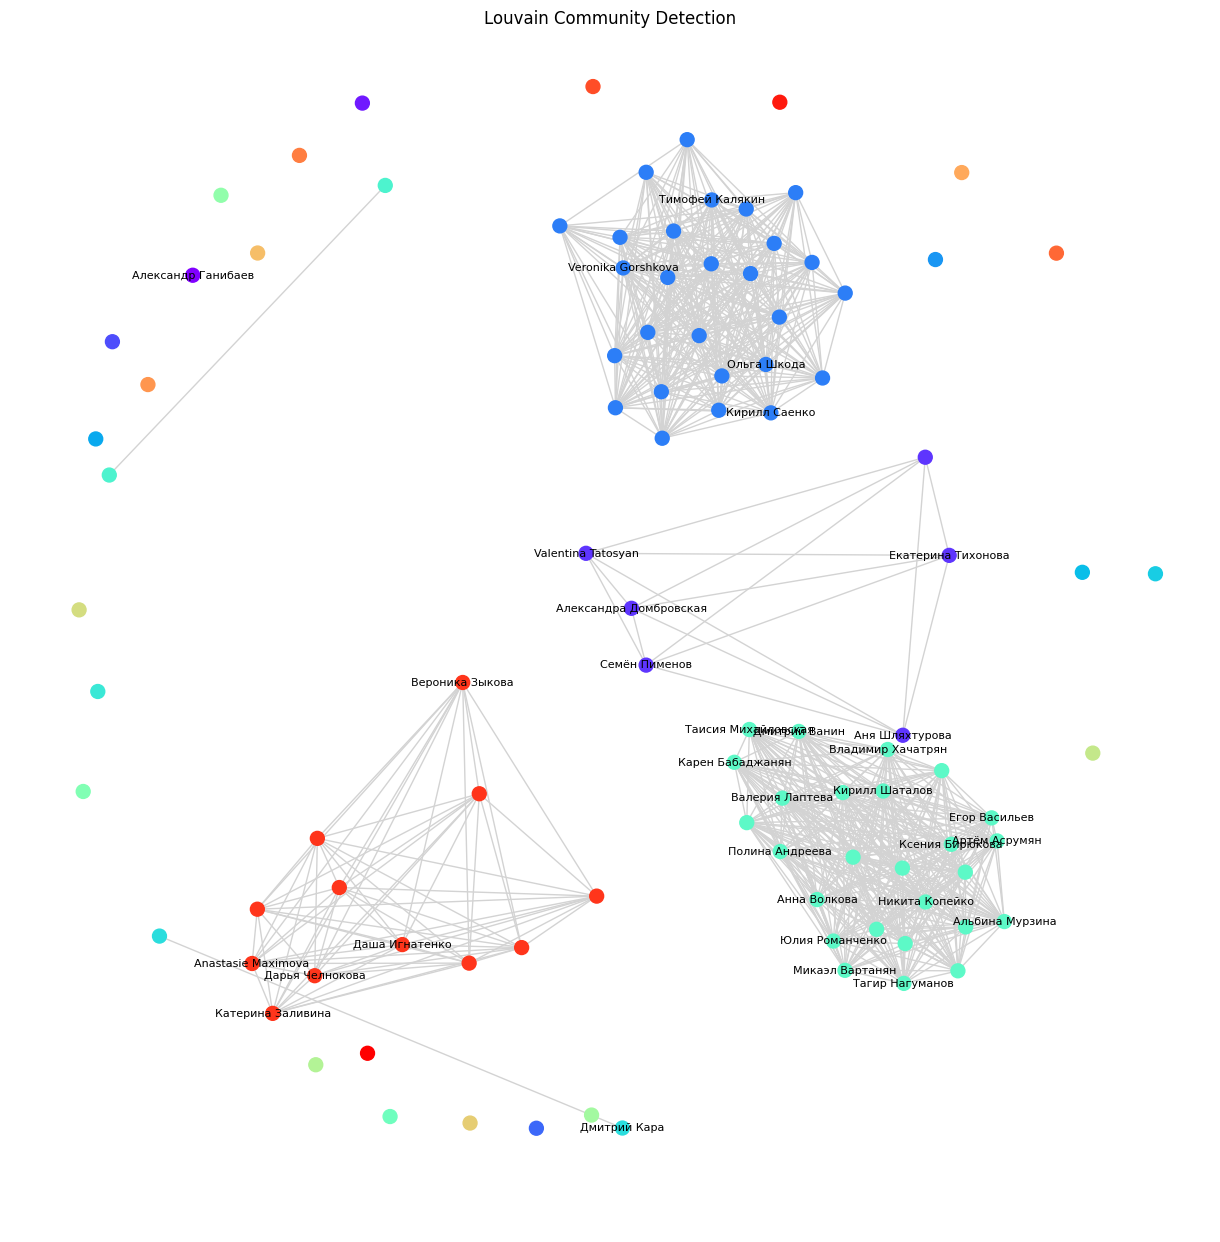

In [201]:
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_color=community_colors, edge_color="lightgray", node_size=100, cmap=plt.cm.rainbow, with_labels=False)
schools = ["Воробьёвы горы", "Лицей № 1525 «Воробьёвы горы»"]
universities = ["МГИМО МИД России", "НИУ ВШЭ (ГУ-ВШЭ)", "МАРХИ"]

eligible_nodes = [node for node, data in G.nodes(data=True) 
                  if data.get("school") in schools or data.get("university") in universities]
labels = {node: node for node in eligible_nodes}

nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color="black")

plt.title("Louvain Community Detection")
plt.show()

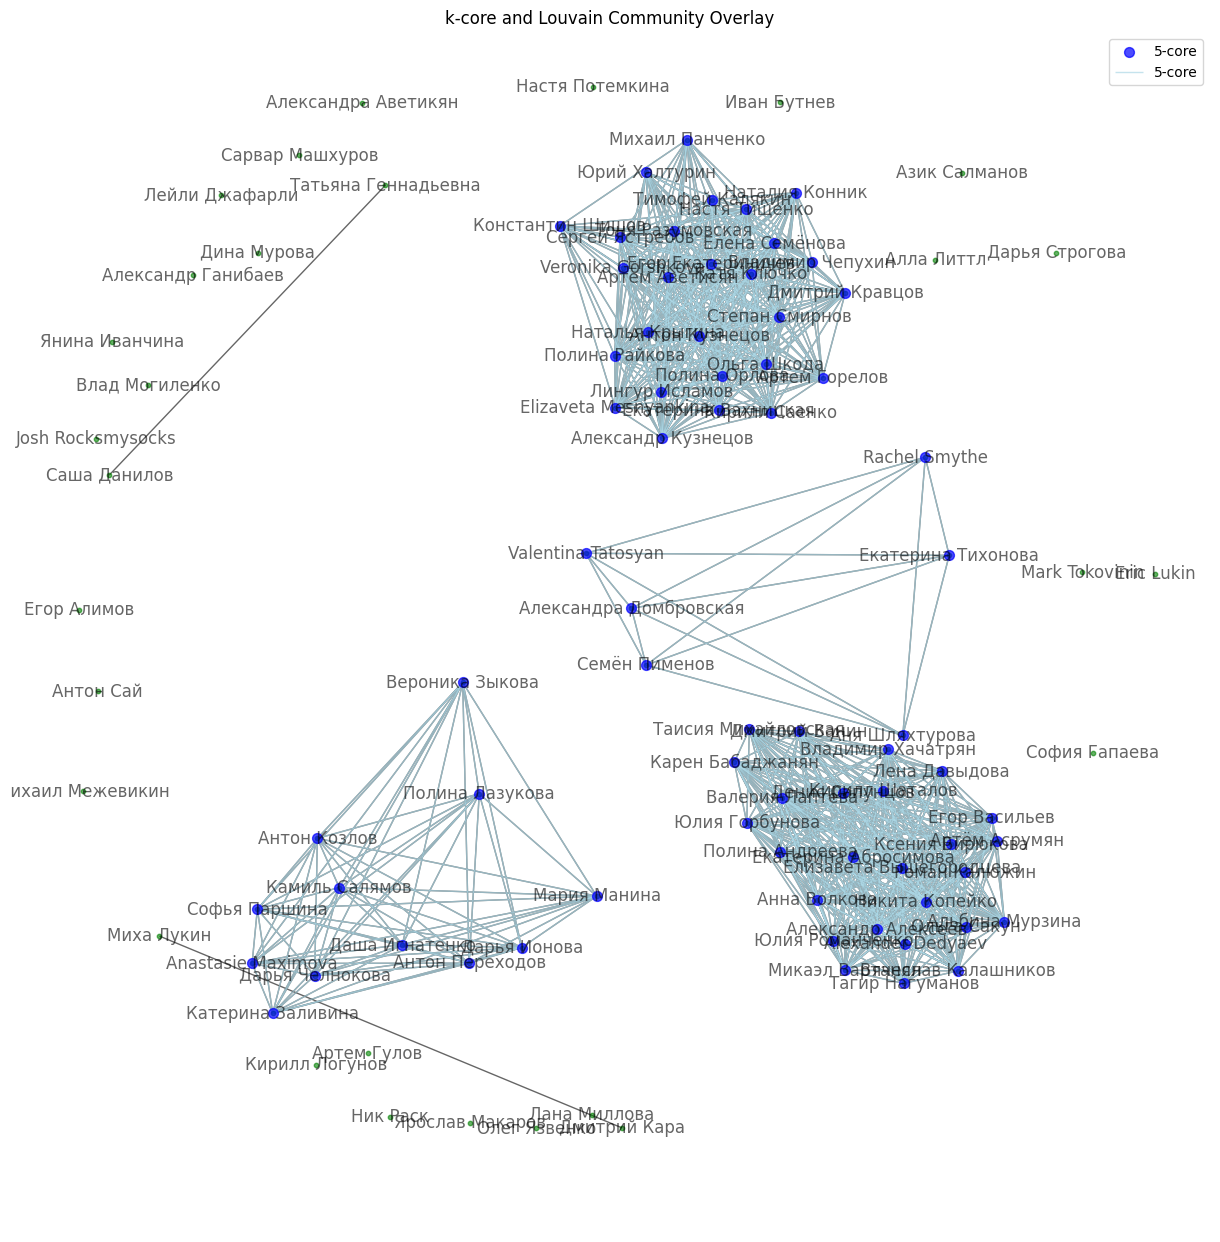

In [202]:
plt.figure(figsize=(12, 12))

nx.draw(G, pos, node_size=10, node_color="green", alpha=0.6, with_labels=True)
nx.draw(k_core, pos, node_size=50, node_color="blue", edge_color="lightblue", alpha=0.7, label=f"{k}-core")

for community, nodes in partition.items():
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G if partition[node] == community],
                           node_size=50, cmap=plt.cm.rainbow, alpha=0.7, label=f"Community {community}")

plt.title("k-core and Louvain Community Overlay")
plt.legend()
plt.show()